# 本篇jupyter notebook...
## Roadmap
1. State the question and determine required data
2. Acquire the data in an accessible format
3. Identify and correct missing datas points/anomalies as required
4. Prepare the data for the machine learning model
5. Establish a baseline model that you aim to exceed
6. Train the model on the training data
7. Make predictions on the test data
8. Compare predictions to the known test set targets and calculate performance metrics
9. If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10. Interpret model and report results visually and numerically

# 1. Data Acquisition
* 收集西雅圖Seattle的天氣資料
* 有80%的時間是用在清理以及獲取資料

In [1]:
# Pandas is used for data manipuliation
import pandas as pd

# Read in data and display first 5 rows
features = pd.read_csv("data/temps.csv")
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


# 2. Identify Anomalies/ Missing Data

In [2]:
print("The shape of our features is:", features.shape)
# 原本features是 （348, 9）

The shape of our features is: (348, 12)


In [3]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


/Users/jack1563311/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


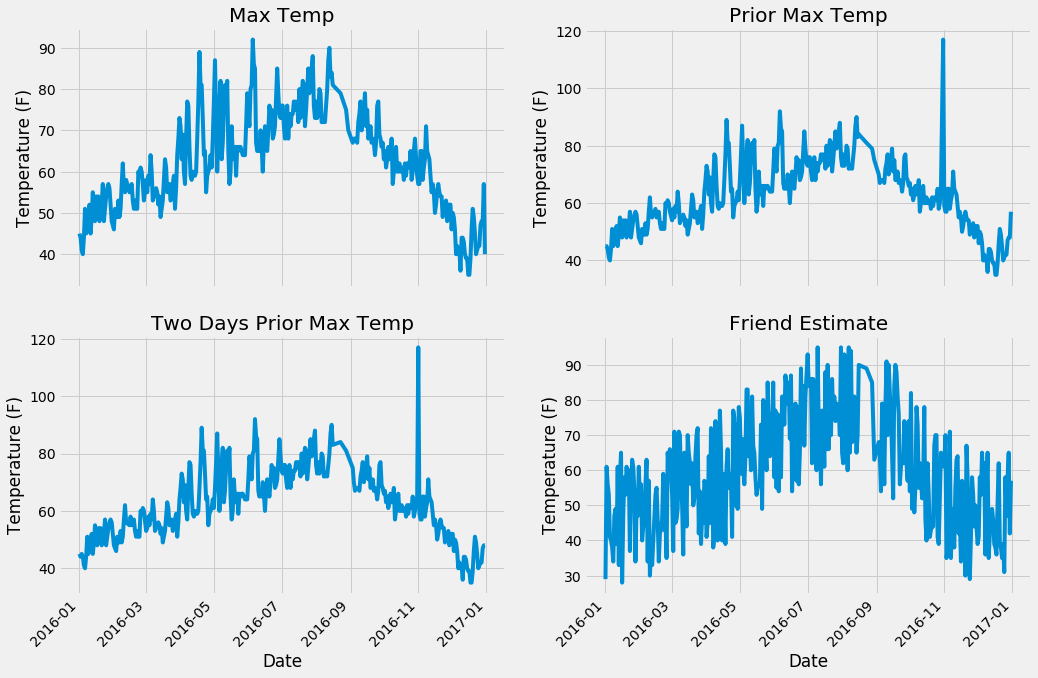

In [4]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')


# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

# Data Preparation
* 直接將raw data餵進模型其實是不太好的，我們需要先進行一些小修正。
### One-Hot Encoding
* 因為model可以學懂數字，但學不懂英文，因此我們先把week轉換成One-Hot Encoding
![1-1](img/1-1.png)
![1-2](img/1-2.png)

In [5]:
# One Hot Encoding
features_dummy = pd.get_dummies(features)
# 新功能發現！Pandas可以直接轉換dummy

In [6]:
features_dummy.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [7]:
# 比較一下兩者差異，新的features_dummy自動把week轉成dummy的One Hot Encoding
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [8]:
features_dummy.shape

(348, 18)

### Features and Targets and Convert Data to Arrays
* 現在我們要把資料分成features和targets。
* target，也就是label，是我們想要predict的標的。在這個case是actual max temperature
* features則是所有其他的column被我們用來做predict

In [9]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
# 我們想要預測實際最大溫度
labels = np.array(features_dummy['actual'])

In [10]:
# 這個vector是我們要預測的溫度
labels

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [36]:
labels.shape

(348,)

In [11]:
# Remove the labels from the features
# axis 1 refers to the columns
features = features_dummy.drop("actual", axis = 1)
# 把actual這欄drop掉，成為我們的features

# Saving feature names for later use
# 我們把特徵名字用list儲存下來
feature_list = list(features.columns)

# 轉成numpy array
features = np.array(features)

In [37]:
features.shape

(348, 17)

### Training and Testing Sets


In [12]:
# 用skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# 把data切成training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 43)

In [13]:
print("Training Features Shape:", train_features.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing Features Shape:", test_features.shape)
print("Testing Labels Shape:", test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


# Establish New Baseline
* Baseline model是我們假設不做任何訓練，所可以得到的最簡單的模型
* 這邊用averages預測

In [14]:
# The baseline predictions are the historical averages
# 在numpy array中 [:, 數字]是指看column
# (array[1, :]) # 第二列
# ([:, 1]) # 第二欄
# ([1, 1]) # 第二列第二欄的元素
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

# round() 會return 浮點數的四捨五入位數
print("Average baseline error: ", round(np.mean(baseline_errors), 2))

Average baseline error:  4.68


In [38]:
test_features

array([[2.016e+03, 1.000e+00, 1.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+01, 2.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 3.000e+00, 2.200e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 1.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 9.000e+00, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 1.200e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

如果我們的model沒有辦法打敗average error = 5的話，我們就要重新想過我們的approach方法

# Train Model

In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error(mae)
print("Mean Absolute Error: ", round(np.mean(errors), 2), "degree.")

Mean Absolute Error:  4.14 degree.


# Determine Performance Metrics
calculate the accuracy

In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 93.25 %.


In [18]:
mape

array([ 4.48333333,  8.09076923,  1.77192982, 23.17301587, 11.87021277,
       10.46111111,  0.28518519,  5.32096774, 17.8375    ,  4.74857143,
        4.00921053,  2.89830508,  2.40632911,  6.55      ,  2.89365079,
       10.14852941, 29.3245614 ,  8.26      ,  7.44814815,  4.71403509,
        6.53846154,  5.3046875 ,  0.88813559,  8.95      ,  5.84666667,
        9.11494253,  5.16153846,  7.96666667,  3.44776119,  7.62545455,
        3.5016129 ,  3.61886792,  8.90769231, 10.28888889,  8.06842105,
        8.07307692,  9.45      ,  1.77594937,  5.56438356, 15.16760563,
       11.53617021, 12.84025974,  8.82272727,  0.22615385,  1.54      ,
        4.45074627,  0.38421053,  9.0265625 ,  8.44583333,  4.24561404,
        9.8125    ,  2.86818182,  0.80461538,  7.78571429,  2.9721519 ,
        1.565     ,  4.28833333, 12.75172414,  4.03492063,  8.27164179,
        3.42727273,  3.21666667,  0.        , 23.        , 10.74558824,
        9.69104478,  2.75522388,  5.99056604, 11.18529412,  5.48

# Interpret Model and Report Result

## First: look at a single tree
* Visualizing a Single Decision Tree

In [24]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import graphviz
import os

# Pull out one tree from the forest
tree = rf.estimators_[5]

In [29]:
# Export the image to a dot file
export_graphviz(tree, out_file="tree.dot", feature_names=feature_list, rounded=True, precision=1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file("tree.dot")

# Write graph to a png file
graph.write_png("tree.png")

In [28]:
#conda install graphviz

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/jack1563311/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.10  |           py37_0           6 KB
 

![tree](img/tree.png)

In [40]:
# limit the depth of trees in the forest
rf_small = RandomForestRegressor(n_estimators=1000, max_depth=3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png
export_graphviz(tree_small, out_file="small_tree.dot", feature_names=feature_list,
               rounded = True, precision=1)

(graph, ) = pydot.graph_from_dot_file("small_tree.dot")

graph.write_png("small_tree.png")

![small_tree](img/small_tree.png)

In [34]:
# limit the depth of trees in the forest
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small2 = rf_small.estimators_[9]

# Save the tree as a png
export_graphviz(tree_small2, out_file="small_tree2.dot", feature_names=feature_list,
               rounded = True, precision=1)

(graph, ) = pydot.graph_from_dot_file("small_tree2.dot")

graph.write_png("small_tree2.png")

![small_tree2](img/small_tree2.png)

# Variable Importance